In [1]:
import openclean
import glob
import pandas as pd
import pyspark 
import numpy as np


In [2]:
pyspark.__version__

'3.2.0'

In [3]:
np.__version__

'1.21.3'

In [4]:
pd.__version__

'1.3.4'

In [5]:
import glob

In [6]:
glob.glob("*")

['DOB_Job_Application_Filings.csv',
 'DOB_Job_Cleaning.ipynb',
 'ic3t-wcy2.tsv.gz',
 'README.md']

## Import out dataset

In [7]:
df  = pd.read_csv('./DOB_Job_Application_Filings.csv', dtype='object')

### Get some basic info about the dataset columns

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774833 entries, 0 to 1774832
Data columns (total 96 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   Job #                          1774833 non-null  object
 1   Doc #                          1774833 non-null  object
 2   Borough                        1774833 non-null  object
 3   House #                        1774827 non-null  object
 4   Street Name                    1774827 non-null  object
 5   Block                          1774081 non-null  object
 6   Lot                            1774077 non-null  object
 7   Bin #                          1774833 non-null  object
 8   Job Type                       1774833 non-null  object
 9   Job Status                     1774833 non-null  object
 10  Job Status Descrp              1774833 non-null  object
 11  Latest Action Date             1774833 non-null  object
 12  Building Type               

If any rows are complete duplicates, drop them

In [9]:
df = df.drop_duplicates()

Take an a look at some of the rows to get an idea of what the datset looks like

In [10]:
df

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673497,01,QUEENS,215-02,93 AVENUE,10618,00028,4226672,A2,R,...,N,NaN,A1,0,40.720067,-73.742696,23,542,Queens Village,4226672
1,440673512,01,QUEENS,10040,222 STREET,10780,00019,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27,568,Queens Village,4231025
2,421133972,02,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
3,421133972,03,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
4,210182309,02,BRONX,97,WEST 169 STREET,02519,00027,2130622,NB,P,...,N,NaN,V0,0,40.839538,-73.923177,16,211,Highbridge,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774828,302042858,01,BROOKLYN,2770,OCEAN AVENUE,07404,00020,3202124,A3,X,...,N,NaN,D1,0,40.593831,-73.950368,48,592,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3202124
1774829,302042867,01,BROOKLYN,313,76 STREET,05940,00078,3148750,A2,R,...,N,NaN,B1,0,40.630611,-74.027435,43,66,Bay Ridge,3148750
1774830,302042876,01,BROOKLYN,1658,66 STREET,05559,00033,3134197,A2,X,...,N,NaN,C3,0,40.620486,-73.994067,38,252,Bensonhurst West,3134197
1774831,302042885,01,BROOKLYN,173,LEXINGTON AVENUE,01968,00043,3056361,A2,Q,...,N,NaN,F9,0,40.687159,-73.955516,36,233,Bedford,3056361


## Describe columns in groups so they fit on screen

In [11]:
df[df.columns[:20]].describe()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e
count,1774833,1774833,1774833,1774827,1774827,1774081,1774077,1774833,1774833,1774833,1774833,1774833,1774833,1773538,1131340,1670714,1581393,1400794,149391,1046417
unique,1584287,20,5,35644,29552,13816,1971,363769,9,17,17,7373,2,106,2,4,2,2,4,5
top,103408705,01,MANHATTAN,1,BROADWAY,00016,00001,1015862,A2,X,SIGNED OFF,10/13/2017,OTHERS,105,N,N,N,N,Y,N
freq,20,1583861,775334,17359,52273,6808,216446,2413,1117073,1050347,1050347,793,1389719,210722,1122869,1461463,1581220,1393358,149388,989635


In [12]:
# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Estab looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN


In [13]:
df[df.columns[20:40]].describe()

,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert
count,602206,1081480,555712,284297,49960,21452,14255,14386,116386,87703,306812,43370,61213,1041742,1039940,1774774,1774821,1774750,1725666,1396638
unique,2,2,1,1,1,1,2,1,1,1,1,1,1,1,16626,17353,35220,913,27087,5
top,Y,Y,X,X,X,X,X,X,X,X,X,X,X,X,GEN. CONSTR.,MICHAEL,HOQUE,PE,083278,Y
freq,384720,1081478,555712,284297,49960,21452,14254,14386,116386,87703,306812,43370,61213,1041742,316603,51058,19159,924243,19195,859575


In [14]:
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

#  Lots of the same First and Last name

# Check names and titles

# APPLICATNT LICENCSE # NEEDS TO BE A STRING TO PERSERVE THE 0 ON IT (PROBABLY)

# Professional Cert looks binary and has 5 values + maybe NAN



In [15]:
df[df.columns[40:60]].describe()

,Pre- Filing Date,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units
count,1774833,1765764,1768254,1195823,1444933,1309680,1774833,1774833,1774833,1774833,1774833,45822,32149,1774833,1774833,1774833,1774833,1774833,1774833,644092
unique,6622,6641,6708,6781,6887,6121,98624,93203,3,18057,24619,2,2,6970,1184,152,319,945,1102,1082
top,06/28/2019,06/28/2019,06/28/2019,07/01/2009,06/26/2008,11/12/2015,$0.00,$100.00,STANDARD,0,0,Y,Y,0,0,0,0,0,0,1
freq,1717,1700,1702,575,663,487,477545,144800,1600942,1704849,1672970,45815,32140,1713489,1677514,821444,396296,821462,454050,117779


In [16]:
# Need to convert date columns to pd.datetime
# RENAME PAID TO PAID DATE
# RENAME FULLY PAID TO FULLY PAID DATE
# RENAME ASSISGNED TO ASSIGNED DATE
# RENAME APPROVED TO APPROVED DATE

# CHECK COHERENCE OF PAID DATE <= FULLY PAID DATE
# CHECK COHERENCE OF PRE FILING DATE <= PAID DATE
# CHECK COHERENCE OF ASSIGNED DATE <= APPROVED DATE
# 

# REMOVE $ FROM Initial Cost and Total Est. Fee, and put them in column name, convert values to floats

# Check What fee status is

# Check Existing Zoning Sqft, Propsed Zoning Sqft, Enlargement SQ Footage for reasonable values
# Change either Sqft to SQ Footage or vvice-versa

# Horizontal Enlrgmt and Vertical Enlrgmt are booleans + NAN
# Change Enlrgmt to Enlargement

#Chcek ExisitngNo. of Stories and proposed No. of Stories for reasonableness
# Add space between Existing and No.
# Change either Job# to Job No. or vice versa
# maybe just change all the No./# to "number"

# Check Existing and proposed height for reasonableness. Add unit to column name

# check Existing Dwelling Units for reasonableness 



In [17]:
df[df.columns[60:80]].describe()

,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #
count,918738,1270588,1062751,1424995,1440051,193632,10263,262130,79909,1701439,1703286,1774553,1774618,1424233,1003,1003,1003,1003,1001,1763366
unique,1173,47,49,5,229,196,135,116,15,14,2,93115,156866,412712,549,756,114,9,212,359264
top,1,RES,RES,NOT APPLICABLE,R6,R8B,C6-6,MID,POPS,CORPORATION,N,MICHAEL,SINGH,OWNER,2,555 WEST 23RD STREET,BROOKLYN,NY,11201,7184728000
freq,172057,411650,289996,717112,149653,19305,1554,84261,27848,575526,1594148,40957,23629,11053,19,17,309,981,46,12731


In [18]:
# check Proposed Dwelling Units
## Why does Existing Occupancy have fewer cats than Proposed Occupancy. Check those.

# What is Site Fill. 

# Get list of NYC ZOning Districts and Special Districts

# Checmk Owner Typer for spelling issues

# Non Profit is binary

# Check Owners's First and last name

# Owner'sBuisness Name should not be "OWNER"

# Owner's house number, streeet name, city, state and zip have almost no values

# Why is the same phone number so common

In [19]:
df[df.columns[80:100]].describe()

,Job Description,DOBRunDate,JOB_S1_NO,TOTAL_CONSTRUCTION_FLOOR_AREA,WITHDRAWAL_FLAG,SIGNOFF_DATE,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
count,1594497,1774833,1774833,1774833,1774833,1063242,1754629,172179,1768356,1774833,1769176,1769176,1769176,1769176,1769176,1752710
unique,1247237,297,1774833,26598,13,5919,4,6373,199,13,217559,228333,51,1328,194,342789
top,PROPOSED INSTALLATION OF HEAVY DUTY SIDEWALK S...,04/28/2021 00:00:00,3293955,0,0,02/12/2018,N,10/24/2012,R0,0,40.748276,-73.984690,4,7,Midtown-Midtown South,3000000
freq,3985,1676399,1,1619529,1752630,603,1519403,5513,209462,1772918,2409,2413,236660,16439,153870,15627


In [20]:

# That is a lot of unique job descriptions

# Add spaces to DOBRunDate name
# make DOBRunDate a datetime

# What is Job_S1_NO. It uses underscores.

# All the remaining columns have ALL CAPS NAMES WITH UNDERSCORES 
# TOTAL_CONSTRUCTION_FLOOR_AREA, WITHDRAWAL_FLAG

# SIGNOFF_DATE needs to be datetime
# SPECIAL_ACTION_STATUS
# SPECIAL_ACTION_DATE needs to be datetime
# BUILDING_CLASS
# What is JOB_NO_GOOD_COUNT
#
# maybe need GIS DATA
# GIS_LATITUDE
# GIS_LONGITUDE
# GIS_COUNCIL_DISTRICT
# GIS_CENSUS_TRACT
# GIS_NTA_NAME
# GIS_BIN
# 

In [21]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

## Renaming columns

In [22]:
df = df.rename(columns={"Owner'sPhone #": "Owner's Phone #"})
df = df.rename(columns={"Owner'sHouse Street Name": "Owner's House Street Name"})

In [23]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    print(df[column_name].value_counts(dropna=False)[:show_rows])
    print()

### Examining Job #s

Some repition in the Job #'s, but nothing major. We will check some of the repeated Job #s to be sure they actually refer to the same jobs

In [24]:
df['Job #'].value_counts(dropna=False)

103408705    20
122705000    13
120438240    13
320843110    12
121189828    11
             ..
121007775     1
121010235     1
320447557     1
121182399     1
302042894     1
Name: Job #, Length: 1584287, dtype: int64

Nothing weird looking here

In [25]:
df['Job #'].min()

'100321046'

In [26]:
df['Job #'].max()

'577777776'

No Job #s starting with 0, so there are integer values, unlike Doc # which has values 01, 02, etc.

In [27]:
df.loc[df['Job #'].str.startswith('0')]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN


Fraction of Rows with unique job numbers

In [28]:
df['Job #'].nunique()/df['Job #'].count()

0.8926400399361517

Group by Job # and check if latitude and longitude are the same all the same for the job, which would indicate different instances of the Job # all refer to the same Job.

In [29]:
group = df[['Job #', 'GIS_LATITUDE', 'GIS_LONGITUDE']].groupby('Job #')

This will take a little while to run

In [30]:
tranformed = group.aggregate(lambda x: x.unique().shape[0])

Jobs with multiple latitude and longitudes:

In [31]:
# 107 potential bad jobs
tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
              |(tranformed['GIS_LONGITUDE']!=1)]

,GIS_LATITUDE,GIS_LONGITUDE
Job #,,
102724759,2,2
102769489,2,2
102875569,2,2
102904467,2,2
103122372,2,2
...,...,...
500592110,2,2
500592138,2,2
500592147,2,2


In [32]:
potential_bad_jobs = list(tranformed.loc[(tranformed['GIS_LATITUDE']!=1)
              |(tranformed['GIS_LONGITUDE']!=1)].index.unique())

Separate these into a temporary dataframe to play around with:

In [33]:
df_temp = df.loc[df['Job #'].isin(potential_bad_jobs)].copy()

In [34]:
df_temp = df_temp.sort_values(['Job #', 'GIS_LATITUDE', 'GIS_LONGITUDE'])

Most of these are just missing lat and long values.

The others look to be Jobs that manage multiple houses/lots in a small area, so are probably correct

In [35]:
df_temp[df_temp.duplicated(subset=['Job #', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
1343881,102724759,01,MANHATTAN,111,8 AVENUE,00739,00001,1013043,A2,R,...,W,05/17/2019,O6,0,40.740704,-74.001844,3,83,Hudson Yards-Chelsea-Flatiron-Union Square,1013043
76256,102724759,03,MANHATTAN,NaN,NaN,00739,00001,1013043,A2,P,...,W,05/17/2019,O6,0,NaN,NaN,NaN,NaN,NaN,NaN
76853,102724759,02,MANHATTAN,NaN,NaN,00739,00001,1013043,A2,G,...,W,05/17/2019,O6,0,NaN,NaN,NaN,NaN,NaN,NaN
1378240,102769489,02,MANHATTAN,1130,ST NICHOLAS AVENUE,02124,00021,1062989,NB,X,...,A,NaN,I9,0,40.839949,-73.939761,10,251,Washington Heights South,1062989
1378246,102769489,03,MANHATTAN,1130,ST NICHOLAS AVENUE,02124,00021,1062989,NB,X,...,A,NaN,I9,0,40.839949,-73.939761,10,251,Washington Heights South,1062989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261816,500461895,01,STATEN ISLAND,1135,WOODROW ROAD,06108,00059,5135616,NB,X,...,N,NaN,B2,0,40.542311,-74.202647,51,20801,Rossville-Woodrow,5135616
261817,500461895,02,STATEN ISLAND,1135,WOODWARD ROAD,06108,00059,5135616,NB,X,...,A,NaN,B2,0,NaN,NaN,NaN,NaN,NaN,NaN
1132752,520305937,03,STATEN ISLAND,2636,HYLAN BOULEVARD,03969,00031,5171652,NB,R,...,N,NaN,K6,0,40.567461,-74.112766,50,12804,New Dorp-Midland Beach,5000000
22768,520305937,01,STATEN ISLAND,2636,HYLAND BOULEVARD,03969,00031,5171652,NB,R,...,N,NaN,K6,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Later, after we have cleaned more values, we will fill these missing values by job #

Remove Jobs we know to be just missing data from the list of bad jobs

In [36]:
not_bad_jobs = df_temp[df_temp.duplicated(subset=['Job #', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]['Job #'].unique()

In [37]:
df_temp = df_temp.loc[~df_temp['Job #'].isin(not_bad_jobs)]

All of these are jobs that handle multiple lots or House #s, which explains why the lat/long change 

Job # 122171130 and 122222638 may be exact copies of each other though

In [38]:
df_temp

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
44671,103128679,02,MANHATTAN,2700,BROADWAY,01875,00018,1056563,NB,R,...,A,NaN,R0,0,40.798924,-73.967851,7,191,Upper West Side,1056563
1442147,103128679,01,MANHATTAN,2692,BROADWAY,01875,07501,1056563,NB,R,...,N,NaN,R0,0,40.799201,-73.968480,7,191,Upper West Side,1056563
1468529,103403899,02,MANHATTAN,2700,BROADWAY,01875,00018,1056563,A1,R,...,W,08/24/2015,R0,0,40.798924,-73.967851,7,191,Upper West Side,1056563
1468528,103403899,01,MANHATTAN,2692,BROADWAY,01875,07501,1056563,A1,R,...,W,08/24/2015,R0,0,40.799201,-73.968480,7,191,Upper West Side,1056563
642372,121347266,02,MANHATTAN,120,CLAREMONT AVENUE,01993,00001,1083664,A2,X,...,N,NaN,W6,0,40.812475,-73.961931,7,211,Morningside Heights,1076684
640575,121347266,01,MANHATTAN,132,CLAREMONT AVENUE,01993,00002,1083664,A2,X,...,N,NaN,W6,0,40.812769,-73.961714,7,211,Morningside Heights,1083664
839890,122171130,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,...,N,NaN,O4,0,40.714447,-74.015493,1,31703,Battery Park City-Lower Manhattan,1000059
839889,122171130,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,...,N,NaN,O4,0,40.714529,-74.015677,1,31703,Battery Park City-Lower Manhattan,1000060
855343,122222638,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,...,N,NaN,O4,0,40.714447,-74.015493,1,31703,Battery Park City-Lower Manhattan,1000059
855342,122222638,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,...,N,NaN,O4,0,40.714529,-74.015677,1,31703,Battery Park City-Lower Manhattan,1000060


In [39]:
df_temp = df_temp.loc[(df_temp['Job #'].isin(['122171130', '122222638']))]

Latest action date is different, so its probably differnt but very similar jobs 

In [40]:
df_temp[df_temp.columns[0:20]]


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e
839890,122171130,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,SIGNED OFF,09/19/2017,OTHERS,101,N,N,NaN,N,Y,NaN
839889,122171130,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,SIGNED OFF,09/19/2017,OTHERS,101,N,N,N,N,Y,N
855343,122222638,02,MANHATTAN,200,VESEY STREET,00016,00140,1000059,A2,X,SIGNED OFF,12/14/2015,OTHERS,101,N,N,NaN,N,Y,NaN
855342,122222638,01,MANHATTAN,250,VESEY STREET,00016,00150,1000060,A2,X,SIGNED OFF,12/14/2015,OTHERS,101,N,N,N,N,Y,N


Check if any Job #s have non-digit values

In [41]:
df['Job #'] = df['Job #'].astype('str')

In [42]:
df.loc[(~df['Job #'].isna())
       &(~df['Job #'].str.isdigit())]['Job #']

Series([], Name: Job #, dtype: object)

All Job #s entirely composed of digits, so we cast them to ints

In [43]:
df['Job #'] = df['Job #'].astype('int')

In [44]:
df['Job #'].describe()

count    1.774833e+06
mean     2.518866e+08
std      1.355759e+08
min      1.003210e+08
25%      1.212317e+08
50%      2.206184e+08
75%      4.011184e+08
max      5.777778e+08
Name: Job #, dtype: float64

## Examining and reparing house #s

House #'s appear to be mostly ints

However, there are legitimate house numbers with dashes so we'll have to make them strings

In [45]:
show_vals('House #', show_rows=10)

Top 10 House #:

1      17359
200    11853
100     8114
11      7231
10      7191
55      7166
40      7105
30      7098
2       6428
150     6380
Name: House #, dtype: int64



Replace NaN values with empty strings, then convert column to string, and make everything uppercase


In [46]:
df['House #'].fillna('', inplace=True)
df['House #'] = df['House #'].astype('str')
df['House #'] = df['House #'].str.upper()

Check for numbers spelled out as words

In [47]:
df.loc[(~df['House #'].isna())
       &(df['House #'].str.isalpha())]['House #']

15545            ONE
1173934         PIER
1180684         PIER
1345596          ONE
1345764          ONE
1378164          ONE
1400111          ONE
1405705          ONE
1513683    MANHATTAN
Name: House #, dtype: object

Maybe the house # and borough were flipped in the 'manhattan' case?

In [48]:
# Nope:
df.loc[df['House #'].str.strip('')=='MANHATTAN'][['House #', 'Borough']]

,House #,Borough
1513683,MANHATTAN,MANHATTAN


Check if thses are empty strings:

In [49]:
df.loc[(~df['House #'].str.contains('\\d', regex=True))]['House #']

15545            ONE
76256               
76440               
76851               
76853               
76859               
76863               
685671     NO NUMBER
1173934         PIER
1180684         PIER
1345596          ONE
1345764          ONE
1378164          ONE
1400111          ONE
1405705          ONE
1513683    MANHATTAN
Name: House #, dtype: object

Replace spelling of numbers with their value, and remove values 'PIER',  'MANHATTAN',  'NO NUMBER'

In [50]:
df.loc[df['House #'].str.strip('')=='ONE', 'House #'] = '1'
df.loc[df['House #'].str.strip('')=='PIER', 'House #'] = ''
df.loc[df['House #'].str.strip('')=='MANHATTAN', 'House #'] = ''
df.loc[df['House #'].str.strip('')=='NO NUMBER', 'House #'] = ''


Most of these will probably be legitimate house numbers, since house numbers can have dashes

In [51]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())]['House #']

0           215-02
2            88-36
3            88-36
6            34-74
15           34-74
            ...   
1774620    186-200
1774621    186-200
1774647    372-380
1774670    633-639
1774815      26-28
Name: House #, Length: 332176, dtype: object

Check non-numeric house #'s that don't have dashes

In [52]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())
      &(~df['House #'].str.contains('-', regex=False))]['House #'][:25]

40            215B
73          270GAR
86          9 WEST
212           128A
274          1715A
275          1715A
279          1715A
301           327A
340           327A
527           687A
553          76GAR
563          2529A
614       1414 GAR
671       368 REAR
694            66A
740           563A
904     536 GARAGE
961          563 A
1010      1058 GAR
1046      1243 GAR
1096         40GAR
1107        126GAR
1113       279 GAR
1166        55 GAR
1167        51 GAR
Name: House #, dtype: object

We see a mix of reference to the house's garage, the rear house and single letters that likely indicate apartments in multi-occupancy venues. 

We will standardize the formatting, and maintain the reference to garage, rear, and appartment, since there is no apartment column for the job.

First split the numbers and words with a space

In [53]:
df['House #'] = df['House #'].str.replace(pat='(?P<one>\\d)(?P<two>[A-Z]+)', repl='\g<one> \g<two>', regex=True)

Now we will fix the formatting for garage and 
remove references to north, south, east, west, since they should be in street #

In [54]:
df['House #'] = df['House #'].str.replace(pat='(?P<one>GAR$)', repl='GARAGE', regex=True)

In [55]:
df['House #'] = df['House #'].str.replace(pat='NORTH([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='EAST([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='SOUTH([A-Z]+)?', repl='', regex=True)
df['House #'] = df['House #'].str.replace(pat='WEST([A-Z]+)?', repl='', regex=True)

In [56]:
# Confirm that it worked correctly:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())
       &(~df['House #'].str.contains('-', regex=False))]['House #'][:30]

40            215 B
73       270 GARAGE
86               9 
212           128 A
274          1715 A
275          1715 A
279          1715 A
301           327 A
340           327 A
527           687 A
553       76 GARAGE
563          2529 A
614     1414 GARAGE
671        368 REAR
694            66 A
740           563 A
904      536 GARAGE
961           563 A
1010    1058 GARAGE
1046    1243 GARAGE
1096      40 GARAGE
1107     126 GARAGE
1113     279 GARAGE
1166      55 GARAGE
1167      51 GARAGE
1175         2769 A
1208           24 A
1343     122 CANOPY
1379           80 A
1439           80 A
Name: House #, dtype: object

## Looking at Binary/Pseudo-binary columns:

For these columns it's clear NaN idicates 'no', since the only other option was 'X' which indicates yes

In [57]:
show_vals('Plumbing')
show_vals('Mechanical')
show_vals('Boiler')
show_vals('Fuel Burning')
show_vals('Fuel Storage')
show_vals('Standpipe')
show_vals('Sprinkler')
show_vals('Fire Alarm')
show_vals('Equipment')
show_vals('Fire Suppression')
show_vals('Curb Cut')
show_vals('Other')

Top 10 Plumbing:

NaN    1219121
X       555712
Name: Plumbing, dtype: int64

Top 10 Mechanical:

NaN    1490536
X       284297
Name: Mechanical, dtype: int64

Top 10 Boiler:

NaN    1724873
X        49960
Name: Boiler, dtype: int64

Top 10 Fuel Burning:

NaN    1753381
X        21452
Name: Fuel Burning, dtype: int64

Top 10 Fuel Storage:

NaN    1760578
X        14254
N            1
Name: Fuel Storage, dtype: int64

Top 10 Standpipe:

NaN    1760447
X        14386
Name: Standpipe, dtype: int64

Top 10 Sprinkler:

NaN    1658447
X       116386
Name: Sprinkler, dtype: int64

Top 10 Fire Alarm:

NaN    1687130
X        87703
Name: Fire Alarm, dtype: int64

Top 10 Equipment:

NaN    1468021
X       306812
Name: Equipment, dtype: int64

Top 10 Fire Suppression:

NaN    1731463
X        43370
Name: Fire Suppression, dtype: int64

Top 10 Curb Cut:

NaN    1713620
X        61213
Name: Curb Cut, dtype: int64

Top 10 Other:

X      1041742
NaN     733091
Name: Other, dtype: int64



Replace the Nan values with False and replace the 'X' values with True, and then cast the columns to be type bool

In [58]:
df['Plumbing'].fillna(False, inplace=True)
df['Mechanical'].fillna(False, inplace=True)
df['Boiler'].fillna(False, inplace=True)
df['Fuel Burning'].fillna(False, inplace=True)
df['Adult Estab'].fillna(False, inplace=True)
df['Fuel Storage'].fillna(False, inplace=True)
df['Standpipe'].fillna(False, inplace=True)
df['Sprinkler'].fillna(False, inplace=True)
df['Fire Alarm'].fillna(False, inplace=True)
df['Fire Suppression'].fillna(False, inplace=True)
df['Curb Cut'].fillna(False, inplace=True)
df['Other'].fillna(False, inplace=True)

In [59]:
df.loc[df['Plumbing']!=False, 'Plumbing'] = True
df.loc[df['Mechanical']!=False, 'Mechanical'] = True
df.loc[df['Fuel Burning']!=False, 'Fuel Burning'] = True
df.loc[df['Adult Estab']!=False, 'Adult Estab'] = True
df.loc[df['Fuel Storage']!=False, 'Fuel Storage'] = True
df.loc[df['Standpipe']!=False, 'Standpipe'] = True
df.loc[df['Sprinkler']!=False, 'Sprinkler'] = True
df.loc[df['Fire Alarm']!=False, 'Fire Alarm'] = True
df.loc[df['Fire Suppression']!=False, 'Fire Suppression'] = True
df.loc[df['Curb Cut']!=False, 'Curb Cut'] = True
df.loc[df['Other']!=False, 'Other'] = True

In [60]:
df['Plumbing'] = df['Plumbing'].astype('bool')
df['Mechanical'] = df['Mechanical'].astype('bool')
df['Boiler'] = df['Boiler'].astype('bool')
df['Fuel Burning'] = df['Fuel Burning'].astype('bool')
df['Adult Estab'] = df['Adult Estab'].astype('bool')
df['Fuel Storage'] = df['Fuel Storage'].astype('bool')
df['Standpipe'] = df['Standpipe'].astype('bool')
df['Sprinkler'] = df['Sprinkler'].astype('bool')
df['Fire Alarm'] = df['Fire Alarm'].astype('bool')
df['Fire Suppression'] = df['Fire Suppression'].astype('bool')
df['Curb Cut'] = df['Curb Cut'].astype('bool')
df['Other'] = df['Other'].astype('bool')

In [61]:

# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Estab looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

# Professional Cert looks binary and has 5 values + maybe NAN
# Non Profit is binary



These columns are less clear cut since they have yes, no, and NaN values

With the exception of "Landmarked" and "Little e", which both have additional values at high frequency, we can probably assume with relatively high confidence that NaN values would indicate false values for these columns, and we will map the columns to boolean values. 

For Landmarked and Little e, we will map NaN to 'N', and leave all the values as strings

In [62]:
show_vals('Landmarked')
show_vals('Loft Board')
show_vals('City Owned')
show_vals('Little e')
show_vals('PC Filed')
show_vals('eFiling Filed')
show_vals('Professional Cert')
show_vals('Non-Profit')
show_vals('Horizontal Enlrgmt')
show_vals('Vertical Enlrgmt')

Top 10 Landmarked:

N      1461463
Y       208859
NaN     104119
L          369
C           23
Name: Landmarked, dtype: int64

Top 10 Loft Board:

N      1393358
NaN     374039
Y         7436
Name: Loft Board, dtype: int64

Top 10 City Owned:

NaN    1625442
Y       149388
I            1
M            1
N            1
Name: City Owned, dtype: int64

Top 10 Little e:

N      989635
NaN    728416
Y       36055
H       20722
M           4
X           1
Name: Little e, dtype: int64

Top 10 PC Filed:

NaN    1172627
Y       384720
N       217486
Name: PC Filed, dtype: int64

Top 10 eFiling Filed:

Y      1081478
NaN     693353
R            2
Name: eFiling Filed, dtype: int64

Top 10 Professional Cert:

Y      859575
N      537059
NaN    378195
J           2
F           1
R           1
Name: Professional Cert, dtype: int64

Top 10 Non-Profit:

N      1594148
Y       109138
NaN      71547
Name: Non-Profit, dtype: int64

Top 10 Horizontal Enlrgmt:

NaN    1729011
Y        45815
N            7
N

Fill null values with False/'N'

In [63]:
df['Landmarked'].fillna('N', inplace=True)
df['Little e'].fillna('N', inplace=True)
df.loc[df['Little e']=='X', 'Little e'] = 'Y' # fix this one-off value for Little e


For the clearly binary cases, fill 'Y' values with True, and the other values with False

In [64]:
df.loc[df['Loft Board']=='Y', 'Loft Board'] = True
df.loc[df['City Owned']=='Y', 'City Owned'] = True
df.loc[df['PC Filed']=='Y', 'PC Filed'] = True
df.loc[df['eFiling Filed']=='Y', 'eFiling Filed'] = True
df.loc[df['Professional Cert']=='Y', 'Professional Cert'] = True
df.loc[df['Non-Profit']=='Y', 'Non-Profit'] = True
df.loc[df['Horizontal Enlrgmt']=='Y', 'Horizontal Enlrgmt'] = True
df.loc[df['Vertical Enlrgmt']=='Y', 'Vertical Enlrgmt'] = True



df.loc[df['Loft Board']!=True, 'Loft Board'] = False
df.loc[df['City Owned']!=True, 'City Owned'] = False
df.loc[df['PC Filed']!=True, 'PC Filed'] = False
df.loc[df['eFiling Filed']!=True, 'eFiling Filed'] = False
df.loc[df['Professional Cert']!=True, 'Professional Cert'] = False
df.loc[df['Non-Profit']!=True, 'Non-Profit'] = False
df.loc[df['Horizontal Enlrgmt']!=True, 'Horizontal Enlrgmt'] = False
df.loc[df['Vertical Enlrgmt']!=True, 'Vertical Enlrgmt'] = False


In [65]:
df['Loft Board'] = df['Loft Board'].astype('bool')
df['City Owned'] = df['City Owned'].astype('bool')
df['PC Filed'] = df['PC Filed'].astype('bool')
df['eFiling Filed'] = df['eFiling Filed'].astype('bool')
df['Professional Cert'] = df['Professional Cert'].astype('bool')
df['Non-Profit'] = df['Non-Profit'].astype('bool')
df['Horizontal Enlrgmt'] = df['Horizontal Enlrgmt'].astype('bool')
df['Vertical Enlrgmt'] = df['Vertical Enlrgmt'].astype('bool')


There does not appear to be anything particularly coherent about the jobs Landmarked or Little e have non-yes/no values

In [66]:
df.loc[~df['Landmarked'].isin(['Y', 'N'])]['Job Description'].value_counts()[:10]

ST BATHOLOMEW'S CHURCH COMMUNITY HOUSE     1
FLUSHING HS CAFETERIA                      1
FELDOR BILLARDS D/B/A FAT CAT BILLIARDS    1
PACIFIC GRILL                              1
NY CITY CENTER REHEARSAL SPACE             1
NY CITY CENTER -STUDIO 5                   1
HSA-UWC INC                                1
FIDDLE STICKS                              1
L'ECOLE                                    1
HAYDEN HALL                                1
Name: Job Description, dtype: int64

In [67]:
df.loc[~df['Landmarked'].isin(['Y', 'N'])][["Owner's First Name", "Owner's Last Name","Owner's Business Name", "Owner's Phone #"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
21769,EILEEN,TORRES,"BRONXWORKS, INC",7185083153
23475,TEITELBAUM,LEOPOLD,UTA,7189639260
23839,DAVID,SALCFAS,ALCONQUIN HOTEL TMES SQ.,2124199330
24424,TOM,JAVITIS,METROPOLITAN MUSEUM OF ART,2126502198
25284,NADER,SHALOM,"BABA VILLAGE, LLC",2126865588
...,...,...,...,...
1601635,MARC,HASKELL,FIFTH AVE BALLROOM LLC,9175326400
1601660,HELMUNT,KROMAR,THE BANK OF NEW YORK,2126356441
1601677,RUSS,CHINNICI,1 BLEECKER STREET ASSOCIATES,9177506701
1601687,ANN,RENGANRDCHI,NaN,5162985929


These have very long + high frequncy job descriptions but it's not clear why

In [68]:
df.loc[~df['Little e'].isin(['Y', 'N'])]['Job Description'].value_counts()[:4]

REMOVAL AND INSTALLATION OF INTERIOR NON BEARING PARTITIONS AND RELATED FINISHES AS PER PLANS FILED HEREWITH.FILED IN CONJUCTION WITH ALTERATION 1 NUMBER 110463356. NO CHANGE IN USE, EGRESS OR OCCUPANCY UNDER THIS APPLICATION. JOB IS REVIEWED UNDER 2008 CODE IN CONJUNCTION WITH ALT 1 APPLICATION 110463356.    103
INSTALLATION OF SCAFFOLD AS PER DRAWINGS. SCAFFOLD SHALL COMPLY WITH CHAPTER #33 OF THE 2008 CODE. NO CHANGE IN USE, OCCUPANCY OR EGRESS UNDER THIS APPLICATION.                                                                                                                                                        64
HVAC AND MECHANICAL MODIFICATIONS AS PER PLANS FILED  AS PER PLANS FILED. FILED IN CONJUNCTION WITH ALTERATION TYPE 1 APPLICATION 110463356.  NO CHANGE IN USE, EGRESS OR OCCUPANCY UNDER THIS APPLICATION.JOB IS REVIEWED UNDER 2008 CODE IN CONJUNCTION WITH ALT 1 APPLICATION 110463356.                             55
PROPOSED INSTALLATION OF HEAVY DUTY SIDEWALK SHED FILED

### Sheng is supposed to look at these:

In [69]:
# Many of these values are the same but spelled differently
## Sheng is supposed to look at these
##show_vals('Other Description')

In [70]:
##df['Other Description'].fillna('', inplace=True)
##df['Other Description'] = df['Other Description'].str.upper()

In [71]:
##df.loc[df['Other Description'].str.contains('GEN')]['Other Description'].value_counts()[:50]

In [72]:
# gen_strs = df.loc[(df['Other Description'].str.contains('GEN'))
#       &(~ df['Other Description'].str.contains('EMER'))
#       &(~ df['Other Description'].str.contains('ENL'))
#       &(~ df['Other Description'].str.contains('GENERAT'))]['Other Description'].unique()

In [73]:
#gen_strs

In [74]:
# df.loc[(~df['Other Description'].str.contains('GEN'))
#       &(~ df['Other Description'].str.contains('EMER'))
#       &(~ df['Other Description'].str.contains('ENL'))
#       &(~ df['Other Description'].str.contains('GENERAT'))]['Other Description'].value_counts()[:50]

In [75]:
# Should remove "MR" when found
#show_vals("Applicant's First Name")

In [76]:
#df["Applicant's First Name"] = df["Applicant's First Name"].astype('str')

In [77]:
# Unclear if these are actual first names mostly (Except for WU (woody))
#df.loc[df["Applicant's First Name"].str.contains(" ")]["Applicant's First Name"].value_counts()

In [78]:
#df["Applicant's Last Name"] = df["Applicant's Last Name"].astype('str')

In [79]:
# At least one of thesse is not all caps, and clearly there are periods in some
#show_vals("Applicant's Last Name")

In [80]:
# Most of these are the same
#show_vals("Applicant Professional Title", show_rows=50)

In [81]:
##show_vals('Applicant License #', show_rows=20)

## Checking Monetary Values for consistency

In [82]:
show_vals("Initial Cost")
show_vals("Total Est. Fee")

Top 10 Initial Cost:

$0.00        477545
$10000.00     57794
$1000.00      55261
$3000.00      51157
$5000.00      50529
$20000.00     43246
$15000.00     38850
$25000.00     35436
$30000.00     30253
$50000.00     30054
Name: Initial Cost, dtype: int64

Top 10 Total Est. Fee:

$100.00    144800
$0.00       58846
$160.00     58050
$130.00     55733
$225.00     42217
$140.00     33609
$200.00     31413
$191.50     26906
$294.50     20432
$346.00     18524
Name: Total Est. Fee, dtype: int64



In [83]:
df['Initial Cost'] = df['Initial Cost'].astype('str')
df['Total Est. Fee'] = df['Total Est. Fee'].astype('str')

Check if any values are not decimals

In [84]:
df.loc[~df["Initial Cost"].str.contains(".", regex=False)]["Initial Cost"].value_counts()

Series([], Name: Initial Cost, dtype: int64)

In [85]:
df.loc[~df["Total Est. Fee"].str.contains(".", regex=False)]["Total Est. Fee"].value_counts()

Series([], Name: Total Est. Fee, dtype: int64)

Dollar signs should be removed and added to column name so we can treat this column as a number

In [86]:
df["Total Est. Fee"] = df["Total Est. Fee"].str.replace("$", '', regex=False)

In [87]:
df["Initial Cost"] = df["Initial Cost"].str.replace("$", '', regex=False)

However we can't convert this to integer dollars because there are decimals.

In [88]:
df.loc[df["Initial Cost"].str.contains("\\.[^0]", regex=True)]["Initial Cost"]

65985       70656.25
66864      387329.94
324722      78474.75
672637     189851.98
1375866    701803.69
1763781       269.23
Name: Initial Cost, dtype: object

Convert to floats

In [89]:
df["Initial Cost"] = df["Initial Cost"].astype('float')
df['Total Est. Fee'] = df['Total Est. Fee'].astype('float')

In [90]:
show_vals("Initial Cost")

Top 10 Initial Cost:

0.0         477545
10000.0      57794
1000.0       55261
3000.0       51157
5000.0       50529
             ...  
17700.0         90
35100.0         89
875000.0        89
294000.0        89
10.0            89
Name: Initial Cost, Length: 771, dtype: int64



In [91]:
df['Total Est. Fee'].value_counts(dropna=False)

100.00      144800
0.00         58846
160.00       58050
130.00       55733
225.00       42217
             ...  
39671.40         1
2529.82          1
9382.07          1
34742.29         1
490.02           1
Name: Total Est. Fee, Length: 93203, dtype: int64

For unclear reasons, adding xticks makes this plot incredibly slow to display.

<AxesSubplot:title={'center':'Initial Cost Frequncy (log-log)'}, ylabel='Frequency'>

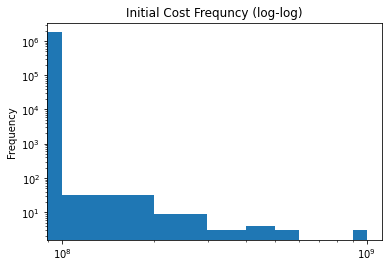

In [92]:
df["Initial Cost"].plot(kind='hist', loglog=True, title='Initial Cost Frequncy (log-log)')

Intial costs appear to be distributed roughly exponentially 

<AxesSubplot:title={'center':'Initial Cost Frequncy, values < 10^8 (log)'}, ylabel='Frequency'>

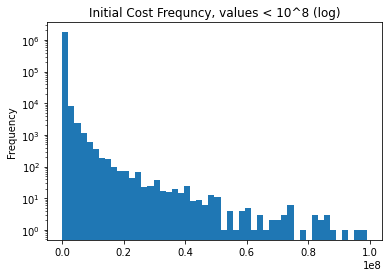

In [93]:
df.loc[df["Initial Cost"]<10**8]["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy, values < 10^8 (log)')

Plotting total estimated fee shows it is also roughly exponential in distribution

<AxesSubplot:title={'center':'Total Est. Fee Frequncy (log-log)'}, ylabel='Frequency'>

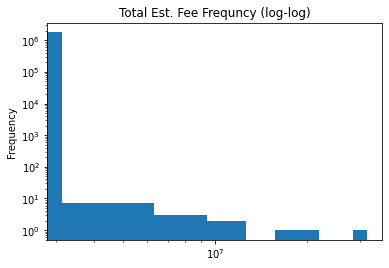

In [94]:
df["Total Est. Fee"].plot(kind='hist', loglog=True, title='Total Est. Fee Frequncy (log-log)')

<AxesSubplot:title={'center':'Total Est. Fee Frequncy, values < 10^7 (log)'}, ylabel='Frequency'>

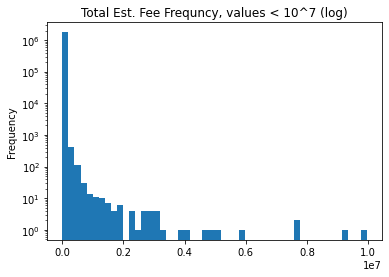

In [95]:
df.loc[df["Total Est. Fee"]<10**7]["Total Est. Fee"].plot(kind='hist', logy=True, bins=50, title='Total Est. Fee Frequncy, values < 10^7 (log)')

Now that we've mapped these to numerical values, we can identifiy additional issues

#### Fixing Initial costs

In [96]:
# Not possible
df["Initial Cost"].min()

-33000.0

In [97]:
# Obviously a fill-in
df["Initial Cost"].max()

999999999.0

In [98]:
df.loc[df['Initial Cost'] < 0]['Initial Cost']

76268    -33000.0
269927     -100.0
Name: Initial Cost, dtype: float64

It's likely that these values were mistakenly entered as negative, so we'll flip them to positive instead of setting them to zero

In [99]:
df.loc[df['Initial Cost'] == -33000.0, 'Initial Cost'] = 33000.0
df.loc[df['Initial Cost'] == -100.0, 'Initial Cost'] = 100.0

This is test data:

In [100]:
#the entire line is filled with fake and false information
# The street name is BIS TEST STREET, and almost every value is either the first possible value for the column type, or empty
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
1076151,140595354,01,MANHATTAN,1,BISTEST STREET,00001,00001,1813361,A2,D,...,C,03/18/2017,O3,0,NaN,NaN,NaN,NaN,NaN,NaN


We will drop this row

In [101]:
df.drop(labels=df.loc[df['Initial Cost'] == 999999999].index[0], axis=0, inplace=True)

In [102]:
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN


These seem to be real probably

In [103]:
df.loc[df['Initial Cost']>= 9000000]["Initial Cost"]

154        81900000.0
517        14975000.0
843        13982000.0
905        10000000.0
1136       14975000.0
              ...    
1766596    40000000.0
1768807    10200000.0
1769081    21574830.0
1769754    14400000.0
1770242    10002000.0
Name: Initial Cost, Length: 1599, dtype: float64

In [104]:
df["Initial Cost"].max()

966331800.0

In [105]:
#nothing wrong with this one anymore
df.loc[df['Initial Cost'] == 966331800]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
662463,201028930,01,BRONX,470,JACKSON AVENUE,02578,00027,2003910,A2,X,...,N,NaN,W1,0,40.811162,-73.909804,8,35,Mott Haven-Port Morris,2003910


<AxesSubplot:title={'center':'Initial Cost Frequncy (log)'}, ylabel='Frequency'>

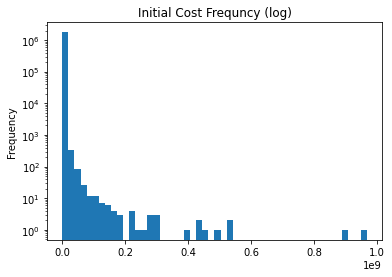

In [106]:
df["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy (log)')

#### Fixing Total Est. Fee

In [107]:
df.loc[df['Total Est. Fee'] < 0 ]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
76268,302188718,07,BROOKLYN,105,LINCOLN PLACE,00948,00072,3019516,A2,P,...,NaN,NaN,B9,0,40.676403,-73.976292,39,159,Park Slope-Gowanus,3019516


We'll fix this as we did with negative monetary values before

In [108]:
df.loc[df['Total Est. Fee'] == -85.8,  'Total Est. Fee'] = 85.8

In [109]:
df['Total Est. Fee'].max()

31500000.0

Also seems to have real information

In [110]:
df.loc[df['Total Est. Fee']==31500000.0]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
67970,322053148,01,BROOKLYN,650,86TH STREET,06056,00015,3153881,NB,P,...,N,NaN,K5,0,40.618851,-74.021875,43,152,Dyker Heights,3153881


## Checking owner's information

In [111]:
show_vals("Owner's Business Name")
show_vals("Owner's House Number")
show_vals("Owner's House Street Name")
show_vals("City ")
show_vals("State")
show_vals("Zip")

Top 10 Owner's Business Name:

NaN                                 350600
OWNER                                11053
NY SCHOOL CONSTRUCTION AUTHORITY      9758
NONE                                  9559
NYC SCA                               9228
VORNADO OFFICE MANAGEMENT             6990
NYCHA                                 6652
SL GREEN REALTY CORP.                 5696
NYC HOUSING AUTHORITY                 5696
NEW YORK CITY HOUSING AUTHORITY       4739
Name: Owner's Business Name, dtype: int64

Top 10 Owner's House Number:

NaN      1773829
2             19
30-30         18
555           17
22            16
1950          16
100           16
10            12
250           11
32            11
Name: Owner's House Number, dtype: int64

Top 10 Owner's House Street Name:

NaN                            1773829
555 WEST 23RD STREET                17
22 CHAPEL STREET                    10
1559 49TH STREET                     9
30-30 THOMSON AVENUE                 9
35 N TYSON AVENUE STE#10

In [112]:
#TO DO:
"""
Owner's Business Name: 
    Fix duplicate names + awkward names like OWNER

City :
    look at lecture slide #45+ in lec 8-data-profiling-cleaning
    levenshtein? fuzzy?
    fix name because it has a trailing space in City 
    Normalize NYC, MANHATTAN, etc as NYC

State:
    Get a list of 50 state codes and remove all the ones that are not in there

Zip:
    A bit tricky because some houses are outside NYC so you can't just get a NYC zip code. Would have to get
    zip code of every state...
"""

"\nOwner's Business Name: \n    Fix duplicate names + awkward names like OWNER\n\nCity :\n    look at lecture slide #45+ in lec 8-data-profiling-cleaning\n    levenshtein? fuzzy?\n    fix name because it has a trailing space in City \n    Normalize NYC, MANHATTAN, etc as NYC\n\nState:\n    Get a list of 50 state codes and remove all the ones that are not in there\n\nZip:\n    A bit tricky because some houses are outside NYC so you can't just get a NYC zip code. Would have to get\n    zip code of every state...\n"

## Fixing owner's informations

In [113]:
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)new york city")]["Owner's Business Name"].value_counts()

NEW YORK CITY HOUSING AUTHORITY     4739
New York City Housing Authority      388
NEW YORK CITY ECONOMIC DEVELOPME      99
NEW YORK CITY SCHOOL CONSTRUCTIO      82
FIRE DEPARTMENT OF NEW YORK CITY      70
                                    ... 
NEW YORK CITY ECONOMIC DEVEL. CO       1
NEW YORK CITY DEP. BEDC                1
NEW YORK CITY ECONOMICAL DEV COR       1
NEW YORK CITY PARKS DEPT.              1
BWT, New York City DEP                 1
Name: Owner's Business Name, Length: 230, dtype: int64

In [114]:
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace("NEW YORK CITY", "NYC")
df["Owner's Business Name"] = df["Owner's Business Name"].str.upper()
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(".", '', regex=False)
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(",", '', regex=False)

In [115]:
#may have to use fuzzy/cluster to fix this problem
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)HOUSING AUTHORITY")]["Owner's Business Name"].value_counts()

NYC HOUSING AUTHORITY               11459
NEW YORK CITY HOUSING AUTHORITY       389
NEW YORK HOUSING AUTHORITY            140
NY CITY HOUSING AUTHORITY              66
NYCHA NY HOUSING AUTHORITY             64
NYCHOUSING AUTHORITY                   30
NY HOUSING AUTHORITY                   25
NYC HOUSING AUTHORITY (NYCHA)          23
NYC  HOUSING AUTHORITY                 15
NEW YORK CTY HOUSING AUTHORITY          6
N Y C HOUSING AUTHORITY                 6
NYC HOUSING AUTHORITY- CAD              6
NEW YORK HOUSING AUTHORITY- DESI        4
NEWYORK CITY HOUSING AUTHORITY          3
NEW YORK  CITY HOUSING AUTHORITY        3
NYCITY HOUSING AUTHORITY                3
NYC HOUSING HOUSING AUTHORITY           3
NEW YORK CITY HHOUSING AUTHORITY        3
NEW CITY HOUSING AUTHORITY              3
NEW YOR CITY HOUSING AUTHORITY          2
NYC-HOUSING AUTHORITY                   2
NEW YORK CITH HOUSING AUTHORITY         2
YC HOUSING AUTHORITY                    2
NYC - HOUSING AUTHORITY           

In [116]:
#All these states are valid
df["State"].value_counts()

NY    981
NJ     11
CA      3
CT      3
MD      1
MA      1
KY      1
VA      1
MO      1
Name: State, dtype: int64

In [117]:
#Since the states can be outside NYC, it probably is valid
df["Zip"].value_counts()

11201    46
10011    31
10022    30
11220    30
11219    27
         ..
10000     1
02895     1
10523     1
08054     1
11436     1
Name: Zip, Length: 212, dtype: int64

## Looking at Phone Numbers:

In [118]:
show_vals("Owner's Phone #")

Top 10 Owner's Phone #:

7184728000    12731
NaN           11467
2128947000    10345
2128637625     5610
7183924921     4411
2122161664     4190
2124072400     3922
7184728534     3346
2125295688     3313
5169355555     3288
Name: Owner's Phone #, dtype: int64



In [119]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')

In [120]:
df.loc[df["Owner's Phone #"].str.contains("7184728000")][["Owner's First Name", "Owner's Last Name","Owner's Business Name", "Owner's Phone #"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
6,JOSEPH,SCALISI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
15,JOSEPH,SCALISI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
36,JOSEPH,SCALISI,NYCSCA,7184728000
76,SRIDHAR,DULPETA-RAMA,SCHOOL CONSTRUCTION AUTHORITY,7184728000
132,EFFIE,TSITIRIDIS,SCHOOL CONSTRUCTION AUTHORITY,7184728000
...,...,...,...,...
1770665,MICHAEL,KALEDA,NYCSA,7184728000
1770806,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000
1770807,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000
1771871,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000


In [121]:
df.loc[df["Owner's Phone #"]=='nan']

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
664,301925442,01,BROOKLYN,975,EAST 55 STREET,07739,00011,3213803,A1,R,...,N,NaN,A9,0,40.633712,-73.923605,46,724,Flatlands,3213803
694,302095104,01,BROOKLYN,66 A,STOCKHOLM STREET,03254,00123,3389150,A1,X,...,N,NaN,B1,0,40.696597,-73.925621,34,421,Bushwick South,3389150
3542,301960947,01,BROOKLYN,4414,10 AVENUE,05607,00041,3136307,A1,R,...,N,NaN,C3,0,40.641681,-73.995968,38,112,Sunset Park East,3136307
5132,200698343,01,BRONX,1200,WATERS PLACE,04226,00070,2087151,A1,R,...,N,NaN,O5,0,40.842733,-73.838373,13,284,Van Nest-Morris Park-Westchester Square,2087151
5189,402163494,01,QUEENS,75-01,162 STREET,06845,00001,4148209,A1,R,...,N,NaN,B3,0,40.726810,-73.806883,24,1241,Pomonok-Flushing Heights-Hillcrest,4148209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774708,302041644,01,BROOKLYN,259,17 STREET,00867,00076,3016463,A2,X,...,N,NaN,C0,0,40.663293,-73.990585,38,143,Park Slope-Gowanus,3016463
1774717,302041733,01,BROOKLYN,123,CALYER STREET,02572,00046,3065081,A2,P,...,N,NaN,C0,0,40.727181,-73.956185,33,561,Greenpoint,3065081
1774742,302041957,01,BROOKLYN,62,MANHATTAN AVENUE,03088,00035,3071408,A2,X,...,N,NaN,S9,0,40.704416,-73.944457,34,491,East Williamsburg,3071408
1774805,302042581,01,BROOKLYN,5516,6 AVENUE,00832,00044,3015040,A2,R,...,N,NaN,C2,0,40.640832,-74.011192,38,100,Sunset Park East,3015040


In [122]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains("-")]["Owner's Phone #"].value_counts()

212582-455    3
212490192-    2
71852751-1    2
0-            2
21255736--    2
212816-22-    1
21267955--    1
212-020844    1
631-323395    1
212808090-    1
2123-51347    1
212269689-    1
71835636-7    1
718888-600    1
71888422--    1
71839130-3    1
718291550-    1
212675200-    1
215-29        1
718767168-    1
149-62        1
157-15        1
146-02        1
163-07        1
243-17        1
718-942300    1
175-27        1
191-15        1
150-24        1
71820585-1    1
718343645-    1
212863749-    1
102-18        1
71845657-6    1
242-01        1
Name: Owner's Phone #, dtype: int64

In [123]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

212  58664    7
212483 077    6
212 929318    5
718 391110    4
718391 105    4
             ..
718 591727    1
212557  36    1
212  21066    1
718  42334    1
9176 96 89    1
Name: Owner's Phone #, Length: 115, dtype: int64

Goals:

Remove all "-" and " "

Check if the 1st value is a 0 or 1, if so, remove it

Remove all with less than or greater than 10 digits


## Cleaning phone number

In [124]:
#df["Owner's Phone #"] = df["Owner's Phone #"].str.replace("-", '')
#df["Owner's Phone #"] = df["Owner's Phone #"].str.replace(" ", '')
#df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains("-")]["Owner's Phone #"].value_counts()

In [125]:
#removes non-numeric characters
df["Owner's Phone #"] = df["Owner's Phone #"].str.extract('(\d+)', expand=False)
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

Series([], Name: Owner's Phone #, dtype: int64)

In [126]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[~df["Owner's Phone #"].isna() & ((df["Owner's Phone #"].str[0] == "0") | (df["Owner's Phone #"].str[0] == "1") | (df["Owner's Phone #"].apply(len) != 10)), ["Owner's Phone #"]] = np.nan

In [127]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[(df["Owner's Phone #"].apply(len) != 10)]["Owner's Phone #"]

238        nan
642        nan
664        nan
694        nan
2026       nan
          ... 
1774708    nan
1774717    nan
1774742    nan
1774805    nan
1774830    nan
Name: Owner's Phone #, Length: 15487, dtype: object

#### Check for non-numeric charaters

In [128]:
df.loc[(~df["Owner's Phone #"].str.isnumeric()) & (~(df["Owner's Phone #"]=='nan'))]["Owner's Phone #"]

Series([], Name: Owner's Phone #, dtype: object)

## Fixing Datetime columns

In [129]:
datetime_column_list = ['Latest Action Date', 'DOBRunDate', 'SPECIAL_ACTION_DATE', 'SIGNOFF_DATE', 
                        'Pre- Filing Date', 'Paid', 'Fully Paid', 'Assigned', 'Fully Permitted', 'Approved']
for col in datetime_column_list:
    show_vals(col)

Top 10 Latest Action Date:

10/13/2017    793
05/18/2017    775
01/25/2017    744
02/12/2018    739
11/30/2016    734
07/11/2016    716
11/29/2016    700
04/30/2018    699
05/04/2017    686
04/20/2016    674
Name: Latest Action Date, dtype: int64

Top 10 DOBRunDate:

04/28/2021 00:00:00    1676399
07/09/2021 00:00:00      17146
09/16/2021 00:00:00       6883
08/02/2021 00:00:00       2656
11/03/2021 00:00:00       1709
11/09/2021 00:00:00       1361
05/25/2021 00:00:00       1254
07/24/2021 00:00:00       1206
08/31/2021 00:00:00       1143
10/05/2021 00:00:00       1116
Name: DOBRunDate, dtype: int64

Top 10 SPECIAL_ACTION_DATE:

NaN           1602654
10/24/2012       5513
05/12/2017        510
10/23/2012        229
02/10/2017        224
08/13/2019        188
03/02/2015        186
06/27/2017        181
03/02/2017        172
11/10/2015        156
Name: SPECIAL_ACTION_DATE, dtype: int64

Top 10 SIGNOFF_DATE:

NaN           711590
02/12/2018       603
01/25/2017       593
05/18/2017     

Check to see if any columns have values in year-month-day format

In [130]:
for col in datetime_column_list:
    print(col, '\n', df.loc[df[col].str.contains('-', regex=False, na=False)][col], '\n\n')

Latest Action Date 
 51518    2005-11-01 
52645    2000-10-17 
55838    2016-07-05 
55978    2018-08-24 
55984    2018-08-24 
            ...     
80477    2003-03-11 
80478    2002-12-19 
80479    2004-10-25 
80480    2004-01-22 
80481    2004-06-22 
Name: Latest Action Date, Length: 967, dtype: object 


DOBRunDate 
 51518    2018-11-02 
52645    2018-11-02 
55838    2018-03-01 
55978    2018-08-25 
55984    2018-08-25 
            ...     
80477    2018-11-02 
80478    2018-11-02 
80479    2018-11-02 
80480    2018-11-02 
80481    2018-11-02 
Name: DOBRunDate, Length: 967, dtype: object 


SPECIAL_ACTION_DATE 
 Series([], Name: SPECIAL_ACTION_DATE, dtype: object) 


SIGNOFF_DATE 
 Series([], Name: SIGNOFF_DATE, dtype: object) 


Pre- Filing Date 
 Series([], Name: Pre- Filing Date, dtype: object) 


Paid 
 Series([], Name: Paid, dtype: object) 


Fully Paid 
 Series([], Name: Fully Paid, dtype: object) 


Assigned 
 Series([], Name: Assigned, dtype: object) 


Fully Permitted 
 Seri

#### Fix DOBRunDate formatting issues
DobRunDate and Latest Action date both have values in multiple datetime formats

We want all the dates to be in a standard year-month-day datetime format, so we'll seperately convert the values not in this format, and in this format to datetime objects


In [131]:
df.loc[~df['DOBRunDate'].str.contains('-', regex=False), 'DOBRunDate'] = pd.to_datetime(
    df.loc[~df['DOBRunDate'].str.contains('-', regex=False)]['DOBRunDate'], infer_datetime_format=True, errors='coerce')

This mapped most of our values to datetimes, now just need to map the rest

In [132]:
df['DOBRunDate'].value_counts()

2021-04-28 00:00:00    1676399
2021-07-09 00:00:00      17146
2021-09-16 00:00:00       6883
2021-08-02 00:00:00       2656
2021-11-03 00:00:00       1709
                        ...   
2019-06-04                   1
2019-05-31                   1
2019-05-15                   1
2019-05-02                   1
2019-06-07                   1
Name: DOBRunDate, Length: 297, dtype: int64

In [133]:
df.loc[:,'DOBRunDate'] = pd.to_datetime(
    df['DOBRunDate'], infer_datetime_format=True, errors='coerce')

In [134]:
df['DOBRunDate']

0         2021-05-06
1         2021-05-22
2         2021-06-25
3         2021-06-25
4         2021-11-11
             ...    
1774828   2021-04-28
1774829   2021-04-28
1774830   2021-04-28
1774831   2021-04-28
1774832   2021-04-28
Name: DOBRunDate, Length: 1774832, dtype: datetime64[ns]

#### Fix Latest Action Date formatting issues

We'll use the same method as above

In [135]:
df.loc[~df['Latest Action Date'].str.contains('-', regex=False), 'Latest Action Date'] = pd.to_datetime(
    df.loc[~df['Latest Action Date'].str.contains('-', regex=False)]['Latest Action Date'], infer_datetime_format=True, errors='coerce')

In [136]:
df['Latest Action Date'].value_counts()

2017-10-13 00:00:00    793
2017-05-18 00:00:00    775
2017-01-25 00:00:00    744
2018-02-12 00:00:00    739
2016-11-30 00:00:00    734
                      ... 
2018-03-26               1
2017-07-23 00:00:00      1
2017-07-30 00:00:00      1
2016-08-02               1
2007-12-15 00:00:00      1
Name: Latest Action Date, Length: 7372, dtype: int64

In [137]:
df.loc[:,'Latest Action Date'] = pd.to_datetime(
    df['Latest Action Date'], infer_datetime_format=True, errors='coerce')

In [138]:
df['Latest Action Date']

0         2021-05-05
1         2021-05-21
2         2021-06-24
3         2021-06-24
4         2021-11-10
             ...    
1774828   2006-02-06
1774829   2007-06-20
1774830   2006-03-14
1774831   2010-06-10
1774832   2007-03-23
Name: Latest Action Date, Length: 1774832, dtype: datetime64[ns]

#### Fix the remaining Datetime columns

In [139]:
for col in datetime_column_list:
    if (col == 'Latest Action Date') or (col == 'DOBRunDate'):
        continue
    else:
        df.loc[:,col] = pd.to_datetime(df[col], infer_datetime_format=True, errors='coerce')

In [140]:
df['SPECIAL_ACTION_DATE'].value_counts(dropna=False)

NaT           1602655
2012-10-24       5513
2017-05-12        510
2012-10-23        229
2017-02-10        224
               ...   
2005-09-30          1
2021-06-05          1
2021-05-16          1
2021-04-24          1
2007-12-05          1
Name: SPECIAL_ACTION_DATE, Length: 6373, dtype: int64

These should all be proper datetime64[ns] columns now:

In [141]:
df.select_dtypes(include='datetime')

,Latest Action Date,Pre- Filing Date,Paid,Fully Paid,Assigned,Approved,Fully Permitted,DOBRunDate,SIGNOFF_DATE,SPECIAL_ACTION_DATE
0,2021-05-05,2021-04-28,2021-04-28,2021-04-28,2021-04-28,2021-04-28,2021-05-05,2021-05-06,NaT,NaT
1,2021-05-21,2021-04-28,2021-04-28,2021-05-04,2021-04-28,2021-05-04,2021-05-21,2021-05-22,NaT,NaT
2,2021-06-24,2021-04-28,2021-04-28,2021-04-28,NaT,NaT,NaT,2021-06-25,NaT,NaT
3,2021-06-24,2021-04-28,2021-04-28,2021-04-28,NaT,NaT,NaT,2021-06-25,NaT,NaT
4,2021-11-10,2021-04-28,2021-04-28,2021-04-28,NaT,NaT,NaT,2021-11-11,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
1774828,2006-02-06,2005-11-14,2005-11-14,2005-11-15,2005-11-17,2005-11-22,2005-12-01,2021-04-28,2006-02-06,NaT
1774829,2007-06-20,2005-11-14,2005-11-14,2005-11-14,NaT,2005-11-14,2006-01-19,2021-04-28,NaT,NaT
1774830,2006-03-14,2005-11-14,2005-11-14,2005-11-14,NaT,2005-11-14,2005-12-05,2021-04-28,2006-03-14,NaT
1774831,2010-06-10,2005-11-14,2005-11-14,2005-11-14,NaT,2005-11-14,NaT,2021-04-28,NaT,NaT


In [142]:
for col in datetime_column_list:
    show_vals(col)

Top 10 Latest Action Date:

2017-10-13    793
2017-05-18    775
2017-01-25    744
2018-02-12    740
2016-11-30    735
2016-07-11    716
2016-11-29    700
2018-04-30    699
2017-05-04    686
2016-04-20    674
Name: Latest Action Date, dtype: int64

Top 10 DOBRunDate:

2021-04-28    1676399
2021-07-09      17146
2021-09-16       6883
2021-08-02       2656
2021-11-03       1709
2021-11-09       1361
2021-05-25       1254
2021-07-24       1206
2021-08-31       1143
2021-10-05       1116
Name: DOBRunDate, dtype: int64

Top 10 SPECIAL_ACTION_DATE:

NaT           1602655
2012-10-24       5513
2017-05-12        510
2012-10-23        229
2017-02-10        224
2019-08-13        188
2015-03-02        186
2017-06-27        181
2017-03-02        172
2015-11-10        156
Name: SPECIAL_ACTION_DATE, dtype: int64

Top 10 SIGNOFF_DATE:

NaT           711591
2018-02-12       603
2017-01-25       593
2017-05-18       580
2017-10-13       576
2016-11-30       572
2016-07-11       558
2012-07-19       540


### Check the coherence of datetime values

These don't make sense, but it's not entirely clear if they should be swapped, or removed or what

In [143]:
df.loc[(df['Paid'] > df['Fully Paid'])
      &(~df['Paid'].isna() & ~df['Fully Paid'].isna())][['Paid', 'Fully Paid']]

,Paid,Fully Paid
32673,2017-08-22,2017-07-14
32774,2017-08-22,2017-07-14
51465,2012-05-15,2012-05-10
52097,2003-10-22,2003-10-21
70757,2008-02-12,2007-04-10
...,...,...
1741114,2003-10-22,2003-10-21
1741115,2003-10-22,2003-10-21
1741117,2003-10-22,2003-10-21
1747694,2004-12-02,2004-05-26


Again here it's not clear how a job could be approved before being assigned, or how a job could have it's latest action date  before the Pre-filing date 

In [144]:
df.loc[(df['Assigned'] > df['Approved'])
      &(~df['Assigned'].isna() & ~df['Approved'].isna())][['Assigned', 'Approved']]

,Assigned,Approved
90,2009-04-10,2008-08-19
93,2021-04-29,2001-07-26
98,2010-06-01,2008-11-22
104,2021-01-12,2010-04-09
105,2021-01-12,2010-04-20
...,...,...
1774715,2007-12-12,2006-05-22
1774722,2017-04-10,2006-03-28
1774740,2007-09-06,2006-02-24
1774784,2020-04-23,2006-08-04


In [145]:
df.loc[(df['Pre- Filing Date'] > df['Latest Action Date'])
      &(~df['Pre- Filing Date'].isna() & ~df['Latest Action Date'].isna())][['Pre- Filing Date', 'Latest Action Date']]

,Pre- Filing Date,Latest Action Date
161423,2003-03-05,2003-01-14
1448890,2002-06-17,2002-06-14


##### These are, however a small percentage of of our total jobs

Fraction of jobs Assigned after they were already approved out of total jobs

In [146]:
df.loc[df['Assigned'] > df['Approved']]['Assigned'].count()/df['Assigned'].count()

0.043688739888762804

Fraction of jobs with Paid Dates after they were already Fully Paid out of total jobs

In [147]:
df.loc[df['Paid'] > df['Fully Paid']]['Paid'].count()/df['Paid'].count()

9.910729809153324e-05

Fraction of jobs with latest action date before the prefiling date out of total jobs

In [148]:
df.loc[df['Pre- Filing Date'] > df['Latest Action Date']]['Pre- Filing Date'].count()/df['Pre- Filing Date'].count()

1.126867218981853e-06

### Checking additional numerical columns for coherency

In [149]:
numerical_columns = ['Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height',
       'Existing Dwelling Units', 'Proposed Dwelling Units']

Try to convert these all to numeric values

In [150]:
for col in numerical_columns:
    df[col] = df[col].astype('str')

In [151]:
for col in numerical_columns:
    print(col)
    print(df.loc[(~df[col].str.isdigit())
      &(df[col]!='nan')][col])
    print()

Proposed Zoning Sqft
Series([], Name: Proposed Zoning Sqft, dtype: object)

Enlargement SQ Footage
328975    -9
Name: Enlargement SQ Footage, dtype: object

Street Frontage
Series([], Name: Street Frontage, dtype: object)

ExistingNo. of Stories
Series([], Name: ExistingNo. of Stories, dtype: object)

Proposed No. of Stories
Series([], Name: Proposed No. of Stories, dtype: object)

Existing Height
Series([], Name: Existing Height, dtype: object)

Proposed Height
148098    -12
Name: Proposed Height, dtype: object

Existing Dwelling Units
471693         .
472368         .
645780     ....4
1391715    ....1
Name: Existing Dwelling Units, dtype: object

Proposed Dwelling Units
413508      NONE
471693         .
472368         .
645780     ....4
1580055    ....1
1661038       -0
1744239     NON5
Name: Proposed Dwelling Units, dtype: object



### Fix these issues so we can covnert to numerical values:

We're going to assume like before that these values are unintentially entered as negative when they should be postive

In [152]:
df['Enlargement SQ Footage'] = df['Enlargement SQ Footage'].str.replace('-', '', regex=False)
df['Proposed Height'] = df['Proposed Height'].str.replace('-', '', regex=False)

In [153]:
df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)
df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)

In [154]:
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('.', '', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('-', '', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NONE', '0', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NON5', '0', regex=False)

##### Try to convert to numerical values now:

In [155]:
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [156]:
for col in numerical_columns:
    show_vals(col)

Top 10 Proposed Zoning Sqft:

0       1672969
1          1237
300         914
2000        374
240         340
5000        288
4000        288
3000        281
2400        273
2500        268
Name: Proposed Zoning Sqft, dtype: int64

Top 10 Enlargement SQ Footage:

0       1713488
200         309
300         265
600         262
1000        258
400         237
500         226
800         206
180         184
240         179
Name: Enlargement SQ Footage, dtype: int64

Top 10 Street Frontage:

0      1677513
25       11019
50        9017
40        8948
20        7187
60        4002
100       2866
30        2742
75        2146
80        1659
Name: Street Frontage, dtype: int64

Top 10 ExistingNo. of Stories:

0     821444
2     175744
3     108221
1      99399
6      88726
4      84299
5      76886
12     27759
7      26001
8      16304
Name: ExistingNo. of Stories, dtype: int64

Top 10 Proposed No. of Stories:

0     396296
2     273443
3     185384
4     124844
6     120730
1     120561
5  

Lets replace NaN values with 0 here and convert to ints

In [157]:
df['Existing Dwelling Units'].fillna(0, inplace=True)
df['Proposed Dwelling Units'].fillna(0, inplace=True)

In [158]:
df['Existing Dwelling Units'] = pd.to_numeric(df['Existing Dwelling Units'], errors='coerce', downcast='integer')
df['Proposed Dwelling Units'] = pd.to_numeric(df['Proposed Dwelling Units'], errors='coerce', downcast='integer')

In [159]:
for col in numerical_columns:
    print(col)
    print("Minimum: ", df[col].min())
    print("Maximum: ", df[col].max())
    print()

Proposed Zoning Sqft
Minimum:  0
Maximum:  29214765

Enlargement SQ Footage
Minimum:  0
Maximum:  22304116

Street Frontage
Minimum:  0
Maximum:  98558

ExistingNo. of Stories
Minimum:  0
Maximum:  999

Proposed No. of Stories
Minimum:  0
Maximum:  999

Existing Height
Minimum:  0
Maximum:  99999

Proposed Height
Minimum:  0
Maximum:  99999

Existing Dwelling Units
Minimum:  0
Maximum:  52121

Proposed Dwelling Units
Minimum:  0
Maximum:  52121



##### Incorrect numerical values here. The tallest building in NYC in One World Trade Center, with 104 stories, and 1,776 ft. 
 All of these cannot be true:

In [160]:
df.loc[df['ExistingNo. of Stories'] >= 105]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
66768,410138934,01,QUEENS,52-01,GRAND CENTRAL PARKWAY,02018,00001,4458851,A2,X,...,N,NaT,Q1,0,40.745464,-73.847072,21,38302,park-cemetery-etc-Queens,4458851
255882,500317891,01,STATEN ISLAND,77,WILBUR STREET,06668,00085,5082753,DM,X,...,N,NaT,A3,0,40.515355,-74.194042,51,198,Annadale-Huguenot-Prince's Bay-Eltingville,5082753
266693,500518772,01,STATEN ISLAND,128,FRANKLIN AVENUE,00064,00135,5148071,DM,X,...,N,NaT,N2,0,40.642424,-74.091954,49,81,West New Brighton-New Brighton-St. George,5148071
297393,110093906,01,MANHATTAN,216,WEST 18 STREET,00767,00054,1082391,A2,R,...,W,2017-04-10,O6,0,40.741366,-73.998614,3,81,Hudson Yards-Chelsea-Flatiron-Union Square,1082391
297629,110102898,01,MANHATTAN,216,WEST 18 STREET,00767,00054,1082391,A2,X,...,N,NaT,O6,0,40.741366,-73.998614,3,81,Hudson Yards-Chelsea-Flatiron-Union Square,1082391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981290,340357492,01,BROOKLYN,872,3 AVE,00679,00001,3336893,A2,H,...,W,2016-03-01,E1,0,40.657680,-74.004195,38,18,Sunset Park West,3336893
1015088,122809336,01,MANHATTAN,209,WEST 57 STREET,01029,00027,1024903,A2,R,...,N,NaT,D4,0,40.765784,-73.980639,4,137,Midtown-Midtown South,1024903
1109022,140639637,01,MANHATTAN,1185,PARK AVENUE,01522,00001,1048384,A3,X,...,N,NaT,D4,0,40.784817,-73.953800,4,15801,Upper East Side-Carnegie Hill,1048384
1136942,123114646,01,MANHATTAN,424,WEST END AVENUE,01228,00061,1032674,A3,X,...,N,NaT,D8,0,40.785296,-73.980457,6,167,Upper West Side,1032674


In [161]:
df.loc[df['Proposed No. of Stories'] >= 105]['Proposed No. of Stories']

17287      135
41421      275
54208      616
61968      212
66768      226
          ... 
1745542    660
1749399    212
1753159    118
1753999    212
1754951    212
Name: Proposed No. of Stories, Length: 461, dtype: int16

In [162]:
df.loc[df['Existing Height'] > 1776]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
2441,340811508,01,BROOKLYN,922,ST MARKS AVENUE,01230,00009,3031058,A2,D,...,N,NaT,M9,0,40.674730,-73.941468,36,343,Crown Heights North,3031058
13752,110086638,01,MANHATTAN,307,WEST 38 STREET,00762,00025,1013643,A2,J,...,N,NaT,O4,0,40.754946,-73.992175,3,115,Clinton,1013643
30398,122831828,01,MANHATTAN,432,PARK AVENUE,01292,00033,1088817,A2,X,...,N,NaT,R0,0,40.761042,-73.971176,4,11202,Midtown-Midtown South,1088817
39588,321756694,01,BROOKLYN,1,BROOKLYN PLAZA,09999,00001,3856237,A2,X,...,N,NaT,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
53700,122576328,01,MANHATTAN,1,CENTRAL PARK WEST,01113,07502,1027191,A2,X,...,N,NaT,R0,0,40.768529,-73.981588,3,145,Lincoln Square,1027191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368940,340724880,01,BROOKLYN,346,7TH AVE,01012,00045,3022378,A3,D,...,C,2020-06-08,S5,0,40.666440,-73.981970,39,151,Park Slope-Gowanus,3022378
1368946,340724915,01,BROOKLYN,346,7TH AVE,01012,00045,3022378,A3,D,...,W,2020-04-09,S5,0,40.666440,-73.981970,39,151,Park Slope-Gowanus,3022378
1386209,440620419,01,QUEENS,11171,179TH ST,10297,00048,4219592,A2,X,...,N,NaT,A2,0,40.697401,-73.772773,27,424,St. Albans,4219592
1394408,340777234,01,BROOKLYN,1178,JEFFERSON AVENUE,03389,00014,3077885,A3,D,...,C,2021-01-16,B2,0,40.690347,-73.914182,37,415,Bushwick South,3077885


In [163]:
df.loc[df['Proposed Height'] > 1776]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
2441,340811508,01,BROOKLYN,922,ST MARKS AVENUE,01230,00009,3031058,A2,D,...,N,NaT,M9,0,40.674730,-73.941468,36,343,Crown Heights North,3031058
12915,140928842,01,MANHATTAN,1,BOGUS LANE,00001,00001,1813360,NB,D,...,N,NaT,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
13752,110086638,01,MANHATTAN,307,WEST 38 STREET,00762,00025,1013643,A2,J,...,N,NaT,O4,0,40.754946,-73.992175,3,115,Clinton,1013643
30398,122831828,01,MANHATTAN,432,PARK AVENUE,01292,00033,1088817,A2,X,...,N,NaT,R0,0,40.761042,-73.971176,4,11202,Midtown-Midtown South,1088817
39588,321756694,01,BROOKLYN,1,BROOKLYN PLAZA,09999,00001,3856237,A2,X,...,N,NaT,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731501,301529665,01,BROOKLYN,630,61 STREET,05793,00020,3143844,A1,X,...,N,NaT,C3,0,40.637080,-74.013771,38,118,Sunset Park East,3143844
1751026,301795546,01,BROOKLYN,2402,AVENUE P,06787,00001,3182688,A2,R,...,W,2012-03-23,M9,0,40.611381,-73.949627,48,548,Madison,3182688
1751180,301797214,01,BROOKLYN,275,PARK AVENUE,01874,00001,3054140,A2,X,...,N,NaT,D6,0,40.696012,-73.967562,35,543,park-cemetery-etc-Brooklyn,3054140
1760118,301897482,01,BROOKLYN,315,92 STREET,06086,00082,3154757,NB,Q,...,W,2006-09-28,C2,0,40.619276,-74.032023,43,58,Bay Ridge,3154757


The largest number of units in one building in NYC is < 1400

In [164]:
df.loc[df['Existing Dwelling Units'] >= 1400]['Job Description'][:35]

11240            MODIFICATIONS TO EXISTING SPRINKLER SYSTEM
11324        MECHANICAL AND SPRINKLER WORK FOR RETAIL SHOP.
27605     INSTALLATION OF RRU UNITS  ON THE ROOF. INSTAL...
29388     APPLICATION FILED HEREWITH FOR THE CONSTRUCTIO...
30730     MODIFICATION TO EXISTING SPRINKLER SYSTEM AS P...
32163     ADDITIONS/MODIFICATIONS TO AN EXISTING FIRE AL...
48409     HEREWITH FILE PLANS TO COMBINE APTS. 24K AND 2...
55969     INSTALLATION OF  TEMPORARY PIPE SCAFFOLD AS SH...
67937     INSTALLATION OF DIRECT AIR COOLING UNIT AND EL...
300331    REMOVE EXISTING PLUMBING FIXTURES AND REPLACE ...
302074    INSTALLING TELECOMMUNICATIONS CABINETS MOUNTED...
302805    INSTALLATION OF 330 LINEAR FEET OF HEAVY DUTY ...
302806    INSTALLATION OF 100 LINEAR FEET OF HEAVY DUTY ...
302807    INSTALLATION OF 200 LINEAR FEET OF HEAVY DUTY ...
302926    ADDITIONS TO EXISTING MODIFIED CLASS J FIRE AL...
302930    INSTALLATION OF 335 LINEAR FEET OF HEAVY DUTY ...
302933    INSTALLATION OF 335 LINEAR FEE

#### map these clearly false numerical values to 0

In [165]:
df.loc[df['ExistingNo. of Stories'] >= 105, 'ExistingNo. of Stories'] = 0
df.loc[df['Proposed No. of Stories'] >= 105, 'Proposed No. of Stories'] = 0
df.loc[df['Existing Height'] >= 1776, 'Existing Height'] = 0
df.loc[df['Proposed Height'] >= 1776, 'Proposed Height'] = 0
df.loc[df['Existing Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0
df.loc[df['Proposed Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0